In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [75]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [76]:
# Load the dataset
file_path = 'data/processed/uhi.csv'
uhi_data = pd.read_csv(file_path)

In [77]:
uhi_data.head()

,date,zipcode,city,avg_lst_c,precipitation_mm,day_length_sec,max_air_temp_c,min_air_temp_c,water_vapor_pressure_pa,wind_dir_degrees,...,deciduous_forest_pct,evergreen_forest_pct,mixed_forest_pct,shrub_scrub_pct,grassland_herbaceous_pct,pasture_hay_pct,cultivated_crops,woody_wetlands_pct,emergent_herbaceous_wetlands_pct,uhi_observed
0,1/1/22,87105,ALBUQUERQUE,6.488817,0.000000,34863.332,5.010303,-2.410101,511.59900,269,...,0.0,0.0,0.0,13.16,0.00,12.83,4.31,0.76,8.22,N
1,1/1/22,87114,ALBUQUERQUE,2.162587,0.000000,34795.473,5.178846,-3.048846,488.16790,269,...,0.0,0.0,0.0,18.75,0.00,1.47,0.00,0.98,3.37,N
2,1/1/22,87120,ALBUQUERQUE,4.510306,0.000000,34818.170,4.741250,-3.248334,481.10764,269,...,0.0,0.0,0.0,70.09,0.03,0.46,0.00,0.16,1.75,N
3,1/1/22,87121,ALBUQUERQUE,4.845354,2.822826,34863.070,4.639294,-3.740950,462.53027,269,...,0.0,0.0,0.0,92.99,0.21,0.05,0.03,0.21,0.31,N
4,1/1/22,87102,ALBUQUERQUE,4.185540,0.000000,34833.610,4.576923,-2.507692,507.88846,269,...,0.0,0.0,0.0,1.96,0.00,0.98,0.00,0.18,2.35,N


In [78]:
# Convert the 'date' column to datetime format
uhi_data['date'] = pd.to_datetime(uhi_data['date'])
# Replace inf values with NaN
uhi_data = uhi_data.replace([np.inf, -np.inf], np.nan)

In [79]:
# Identify numeric features
numeric_features = uhi_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Features:", numeric_features)

Numeric Features: ['zipcode', 'avg_lst_c', 'precipitation_mm', 'day_length_sec', 'max_air_temp_c', 'min_air_temp_c', 'water_vapor_pressure_pa', 'wind_dir_degrees', 'wind_speed_kmh', 'atm_pressure_hpa', 'population_density', 'percent_impervious', 'open_water_pct', 'developed_open_space_pct', 'developed_low_intensity_pct', 'developed_medium_intensity_pct', 'barren_land_pct', 'deciduous_forest_pct', 'evergreen_forest_pct', 'mixed_forest_pct', 'shrub_scrub_pct', 'grassland_herbaceous_pct', 'pasture_hay_pct', 'cultivated_crops', 'woody_wetlands_pct', 'emergent_herbaceous_wetlands_pct']


In [80]:
# Display basic statistics for the dataset
print("\nBasic Statistics for Numeric Features:")
print(uhi_data[numeric_features].describe())


Basic Statistics for Numeric Features:
            zipcode     avg_lst_c  precipitation_mm  day_length_sec  \
count  50413.000000  50413.000000      50413.000000    50413.000000   
mean   81609.276992     28.762811          0.510967    44175.229494   
std    14291.944296     13.681725          2.553902     6418.696016   
min    43201.000000    -17.011827          0.000000    29386.650000   
25%    80224.000000     17.149008          0.000000    38118.277000   
50%    87121.000000     31.155640          0.000000    45029.184000   
75%    89131.000000     39.546135          0.000000    50292.400000   
max    98136.000000     57.783436         48.720910    57013.340000   

       max_air_temp_c  min_air_temp_c  water_vapor_pressure_pa  \
count    50413.000000    50413.000000             50413.000000   
mean        24.315280        9.019580               851.046082   
std         10.254264        9.939725               506.905814   
min        -13.425200      -25.528378                70.

In [81]:
# Setting plot style
sns.set(style="whitegrid")

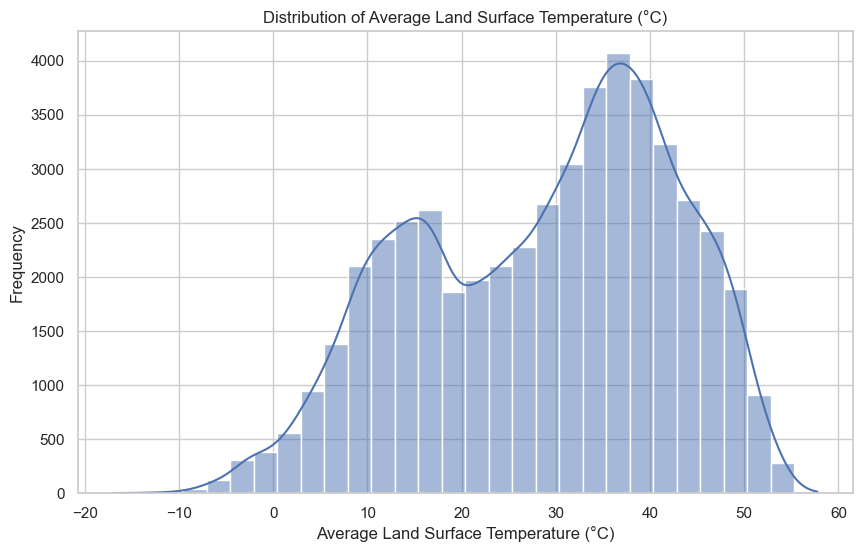

In [82]:
# Distribution of Average Land Surface Temperature
plt.figure(figsize=(10, 6))
sns.histplot(uhi_data['avg_lst_c'], kde=True, bins=30)
plt.title('Distribution of Average Land Surface Temperature (°C)')
plt.xlabel('Average Land Surface Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

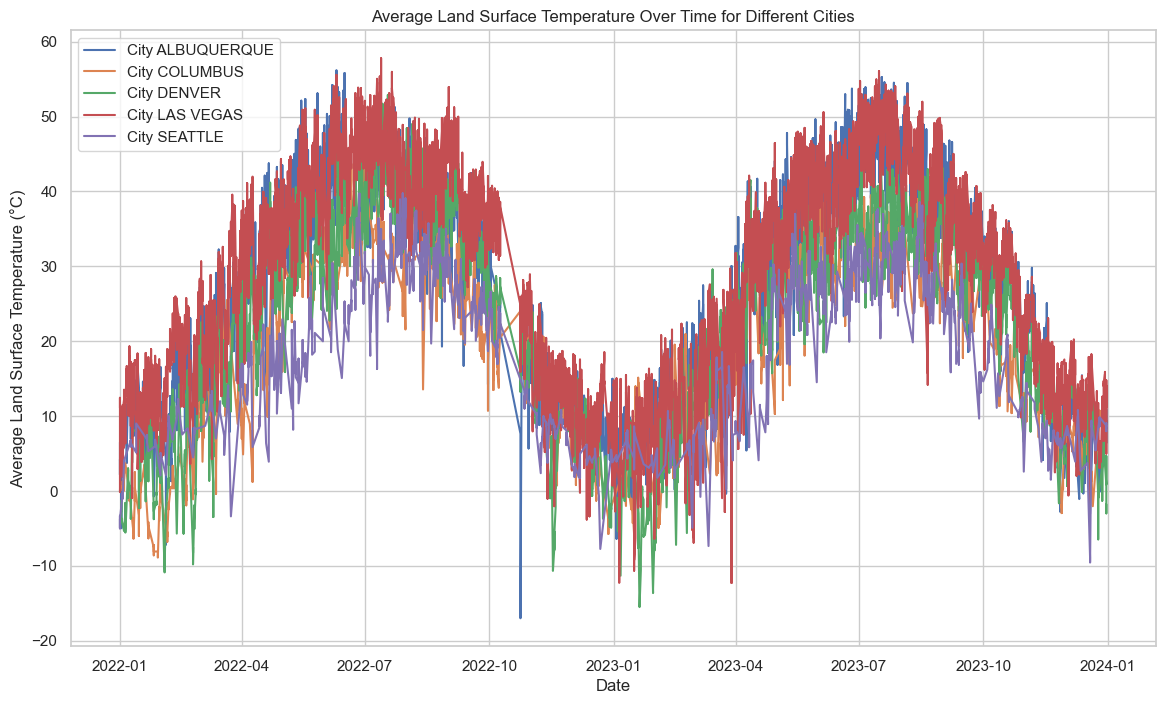

In [83]:
# Average Land Surface Temperature Over Time for Different Cities
plt.figure(figsize=(14, 8))
sample_cities = uhi_data['city'].unique()  # Select a few cities for visualization
for city in sample_cities:
    city_data = uhi_data[uhi_data['city'] == city]
    plt.plot(city_data['date'], city_data['avg_lst_c'], label=f'City {city}')

plt.title('Average Land Surface Temperature Over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.legend()
plt.show()

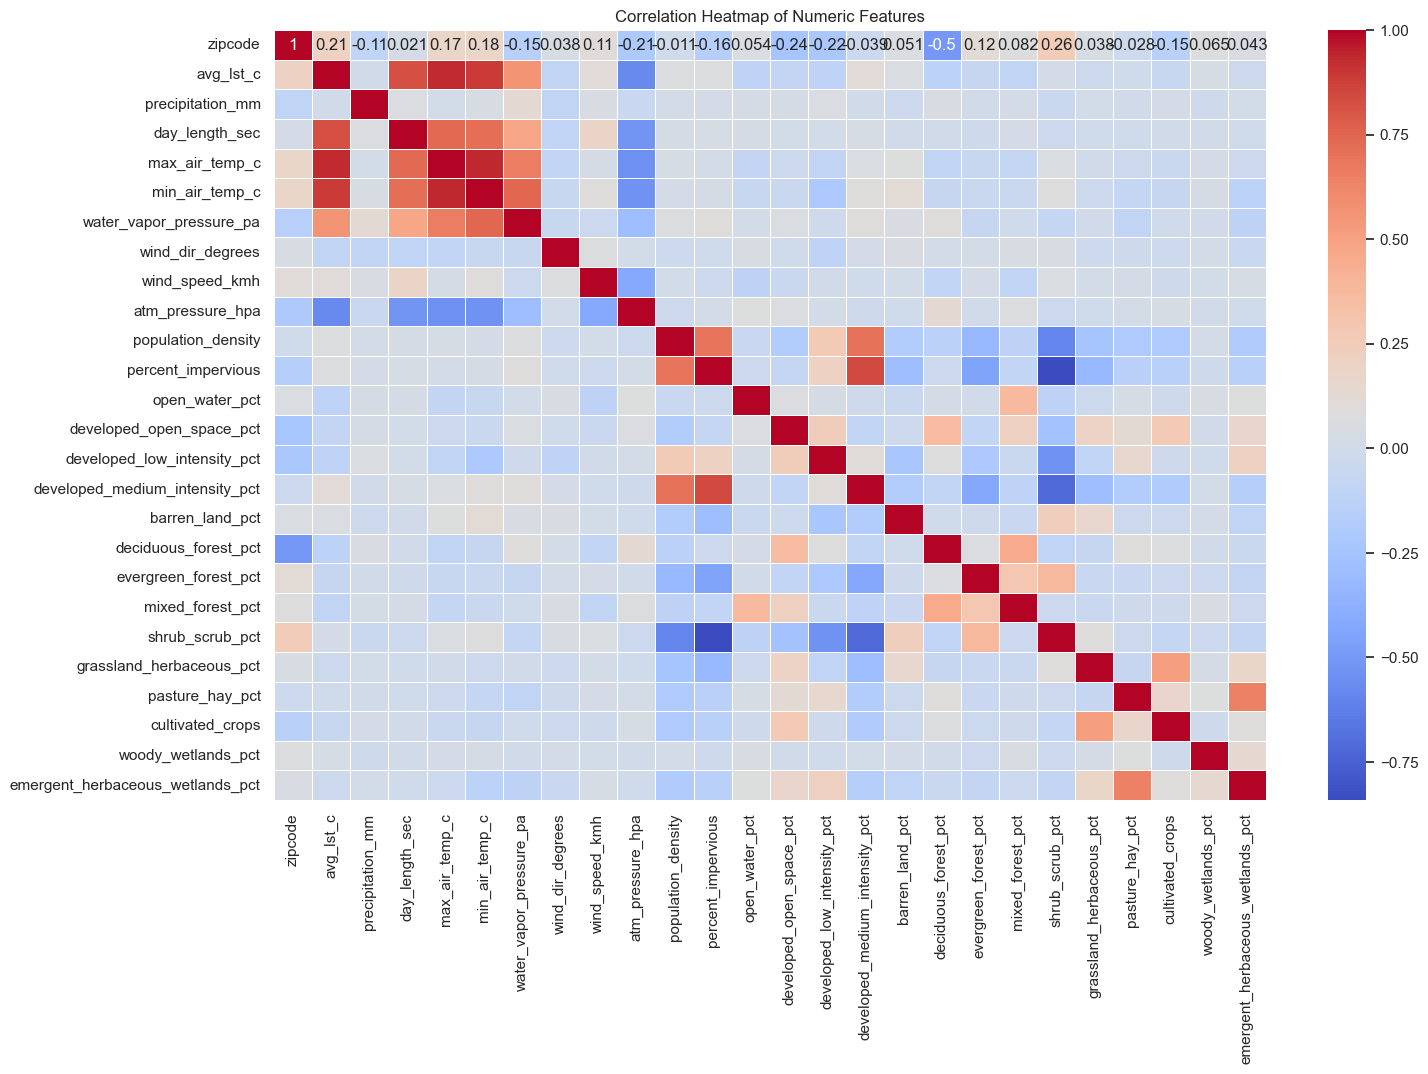

In [84]:
# Correlation Heatmap of Numeric Features
plt.figure(figsize=(16, 10))
corr_matrix = uhi_data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

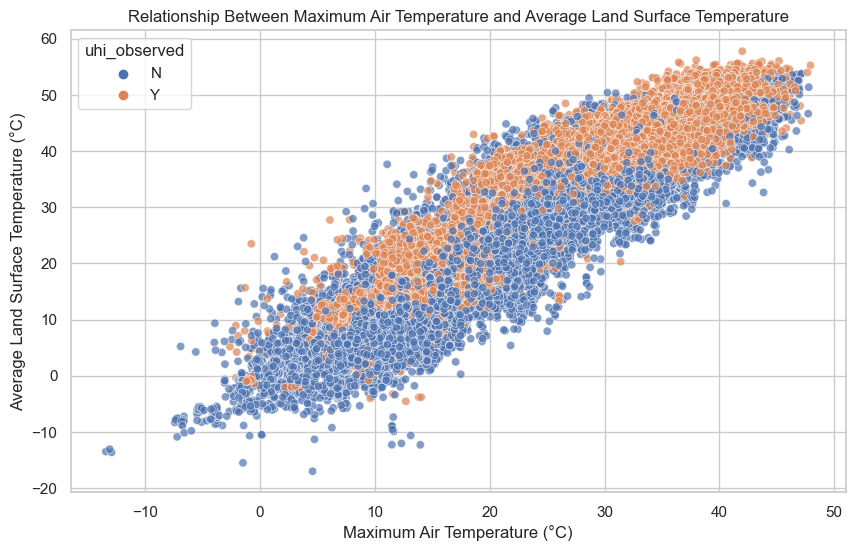

In [85]:
# Relationship Between Average Land Surface Temperature and Maximum Air Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uhi_data, x='max_air_temp_c', y='avg_lst_c', hue='uhi_observed', alpha=0.7)
plt.title('Relationship Between Maximum Air Temperature and Average Land Surface Temperature')
plt.xlabel('Maximum Air Temperature (°C)')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.show()

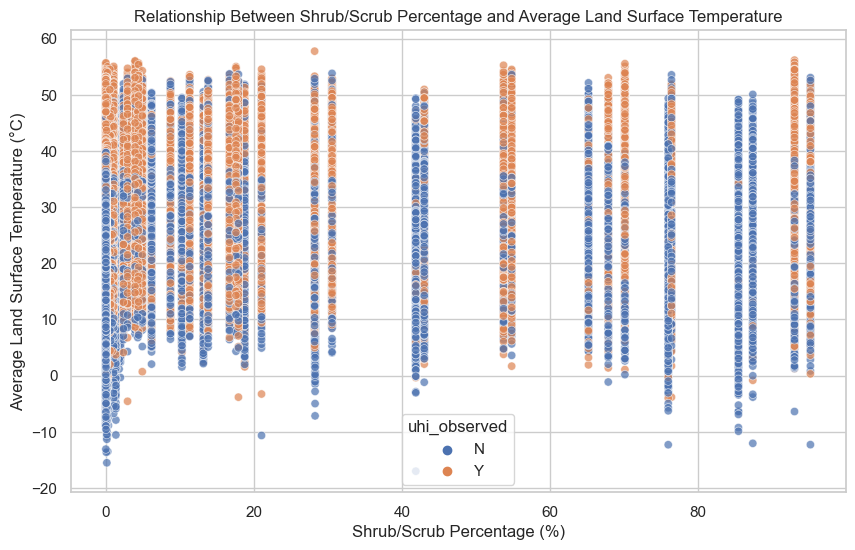

In [86]:
# Average LST by Land Cover Type - Shrub/Scrub Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uhi_data, x='shrub_scrub_pct', y='avg_lst_c', hue='uhi_observed', alpha=0.7)
plt.title('Relationship Between Shrub/Scrub Percentage and Average Land Surface Temperature')
plt.xlabel('Shrub/Scrub Percentage (%)')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.show()

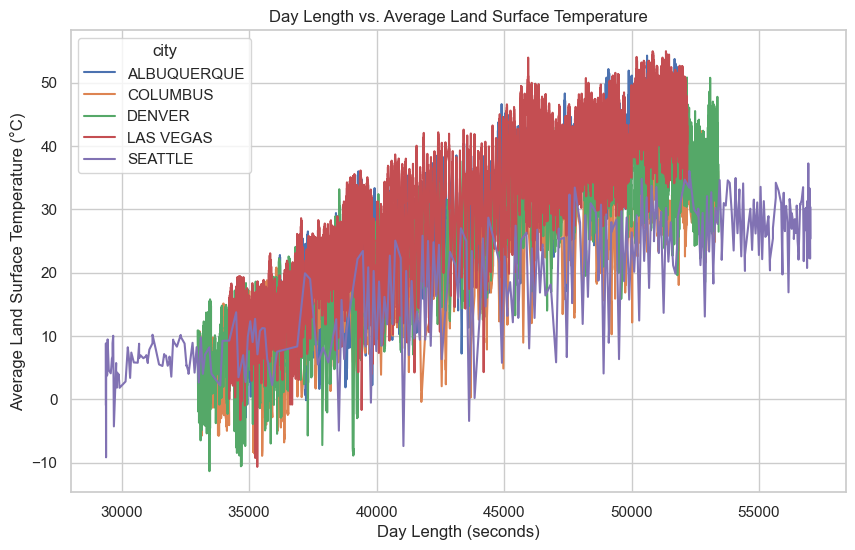

In [87]:
# Day Length vs. Average Land Surface Temperature
plt.figure(figsize=(10, 6))
sns.lineplot(data=uhi_data, x='day_length_sec', y='avg_lst_c', hue='city', ci=None)
plt.title('Day Length vs. Average Land Surface Temperature')
plt.xlabel('Day Length (seconds)')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.show()